In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,NaN,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,NaN,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,NaN,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,NaN,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,NaN,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
int64		column 2	0
float64		column 3	19
float64		column 4	0
float64		column 5	18
float64		column 6	18
float64		column 7	0
float64		column 8	18
float64		column 9	18
float64		column 10	37
float64		column 11	19
float64		column 12	18
float64		column 13	0
float64		column 14	18
float64		column 15	37
float64		column 16	0
float64		column 17	18
float64		column 18	37
float64		column 19	18
float64		column 20	0
float64		column 21	36
float64		column 22	18
float64		column 23	0
float64		column 24	0
float64		column 25	0
float64		column 26	18
float64		column 27	55
float64		column 28	37
float64		column 29	0
float64		column 30	0
float64		column 31	54
float64		column 32	55
float64		column 33	0
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,333.000000,351.0,332.000000,351.000000,333.000000,333.000000,351.000000,333.000000,333.000000,314.000000,...,351.000000,333.000000,296.000000,314.000000,351.000000,351.000000,297.000000,296.000000,351.000000,351.000000
mean,0.891892,0.0,0.663169,0.044372,0.598788,0.117698,0.550095,0.097795,0.509777,0.167940,...,0.396135,-0.072347,0.548613,-0.065855,0.378445,-0.027907,0.377135,-0.021586,0.349364,0.014480
std,0.310984,0.0,0.467196,0.441435,0.511304,0.448876,0.492654,0.512891,0.506405,0.462080,...,0.578451,0.502820,0.503952,0.535220,0.575886,0.507974,0.543016,0.461609,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.497812,-0.064735,0.412450,-0.024230,0.211310,-0.055670,0.109910,-0.045055,...,0.000000,-0.300630,0.342147,-0.410092,0.000000,-0.236885,0.000000,-0.221495,0.000000,-0.165350
50%,1.000000,0.0,0.879285,0.016310,0.801510,0.019540,0.728730,0.011280,0.667250,0.016600,...,0.553890,-0.015350,0.689360,-0.017685,0.496640,0.000000,0.451140,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.315430,0.969240,0.356390,0.947210,0.454072,...,0.905240,0.152540,0.967753,0.145928,0.883465,0.154075,0.851980,0.136408,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

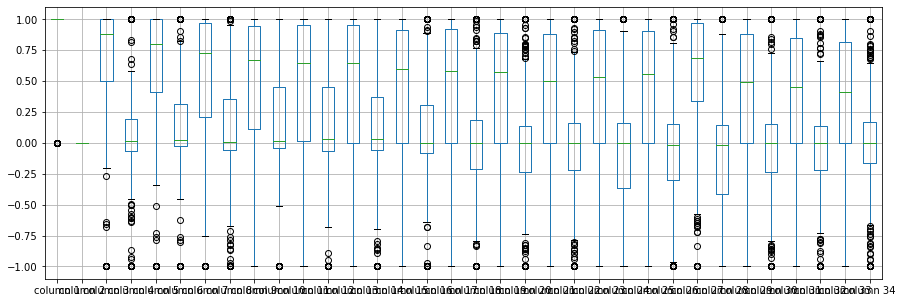

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891892
column 2     0.000000
column 3     0.663169
column 4     0.044372
column 5     0.598788
column 6     0.117698
column 7     0.550095
column 8     0.097795
column 9     0.509777
column 10    0.167940
column 11    0.467102
column 12    0.153537
column 13    0.400801
column 14    0.106552
column 15    0.357324
column 16    0.071132
column 17    0.381270
column 18   -0.000095
column 19    0.359289
column 20   -0.024025
column 21    0.355558
column 22    0.009537
column 23    0.362475
column 24   -0.057406
column 25    0.396135
column 26   -0.072347
column 27    0.548613
column 28   -0.065855
column 29    0.378445
column 30   -0.027907
column 31    0.377135
column 32   -0.021586
column 33    0.349364
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.299714,-0.005832,0.181219,0.101945,0.241985,0.089275,0.229720,-0.003161,...,0.033456,0.136145,-0.168952,-0.040933,0.123356,-0.126440,0.080701,-0.111715,0.155401,0.015045
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.299714,NaN,1.000000,0.230279,0.519552,0.057462,0.457412,0.018902,0.480919,0.055529,...,0.297071,-0.194053,0.082507,0.095740,0.388149,0.086840,0.206830,0.050906,0.236744,-0.029981
column 4,-0.005832,NaN,0.230279,1.000000,0.017138,-0.149579,-0.054030,0.220867,-0.298579,0.241755,...,-0.104632,-0.211819,-0.012276,-0.026240,-0.041090,0.342301,-0.134586,-0.049379,-0.153964,0.034608
column 5,0.181219,NaN,0.519552,0.017138,1.000000,0.079732,0.571126,-0.015911,0.499821,-0.059202,...,0.245828,-0.068204,0.164214,0.168618,0.246142,0.047750,0.370539,-0.027027,0.385005,-0.084636
column 6,0.101945,NaN,0.057462,-0.149579,0.079732,1.000000,-0.006375,0.304014,-0.087856,0.234870,...,-0.142478,0.012137,-0.167686,-0.054896,-0.026323,-0.110599,-0.143597,0.335259,0.039468,0.236909
column 7,0.241985,NaN,0.457412,-0.054030,0.571126,-0.006375,1.000000,-0.161490,0.463888,-0.069590,...,0.286749,0.071884,0.060319,0.061966,0.300632,-0.015158,0.425812,-0.000583,0.545881,-0.076460
column 8,0.089275,NaN,0.018902,0.220867,-0.015911,0.304014,-0.161490,1.000000,-0.266894,0.278715,...,-0.161788,-0.087248,-0.264877,0.074670,-0.137877,0.101623,-0.127494,0.151329,-0.207266,0.388669
column 9,0.229720,NaN,0.480919,-0.298579,0.499821,-0.087856,0.463888,-0.266894,1.000000,-0.249273,...,0.381204,0.054623,0.164692,0.174263,0.324086,-0.013238,0.270880,-0.066442,0.346046,-0.075021
column 10,-0.003161,NaN,0.055529,0.241755,-0.059202,0.234870,-0.069590,0.278715,-0.249273,1.000000,...,-0.295677,0.064843,-0.257488,0.012943,-0.134803,0.002823,-0.127214,-0.083434,-0.177568,0.068450


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+46,34+46+46,34+46+46+46,34+46+46+46+46,34+46+46+46,34+46+46,34+46,34], vae_layer = False, seed = 460)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.14775158110119
Epoch: 1 , loss: 19.053675152006605
Epoch: 2 , loss: 18.999276569911412
Epoch: 3 , loss: 19.00521668933687
Epoch: 4 , loss: 18.91758128574916
Epoch: 5 , loss: 18.94771485101609
Epoch: 6 , loss: 18.81841804867699
Epoch: 7 , loss: 18.754044487362815
Epoch: 8 , loss: 18.764876229422434
Epoch: 9 , loss: 18.5431706564767
Epoch: 10 , loss: 18.087735493977863
Epoch: 11 , loss: 17.18861843290783
Epoch: 12 , loss: 16.896606036594935
Epoch: 13 , loss: 16.74398272378104
Epoch: 14 , loss: 16.59178960890997
Epoch: 15 , loss: 16.60716742560977
Epoch: 16 , loss: 16.633446965898788
Epoch: 17 , loss: 16.480804443359375
Epoch: 18 , loss: 16.33772345951625
Epoch: 19 , loss: 16.44285842350551
Epoch: 20 , loss: 16.14491994040353
Epoch: 21 , loss: 16.40511176699684
Epoch: 22 , loss: 16.390693709963845
Epoch: 23 , loss: 16.48179494766962
Epoch: 24 , loss: 16.307647250947497
Epoch: 25 , loss: 16.096316882542

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -0.077006
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -0.046655
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
1,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
2,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.022576,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
3,0.0,0,0.0,0.0,-0.59455,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
4,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.59116,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
347,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.436002,0.00000,0.0,0.0
348,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.014891,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
349,0.0,0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14.859771994159267

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.21705719028036455

In [19]:
new_df.iloc[66,:]

column 1     0.828641
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.245980
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.037600,...,0.56811,-0.51171,0.410780,-0.461680,0.21266,-0.34090,0.422670,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.045490,...,-0.20332,-0.26569,-0.204680,-0.184010,-0.19040,-0.11593,-0.166260,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.034556,...,0.57528,-0.40220,0.589840,-0.221450,0.43100,-0.17365,0.604360,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,0.40545,1.00000,0.71216,-1.00000,0.00000,0.000000,...,1.00000,0.90695,0.516130,1.000000,1.00000,-0.20099,0.256820,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.163990,...,0.03286,-0.65158,0.132900,-0.532060,0.02431,-0.62197,-0.057070,-0.00457,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.046220,...,0.95378,-0.04202,0.834790,0.001230,1.00000,0.12815,0.866600,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.016060,...,0.94520,0.01361,0.935220,0.049250,0.93159,0.08168,0.504658,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.024460,...,0.93988,0.03193,0.939781,0.025420,0.92120,0.02242,0.924590,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.001100,...,0.91050,-0.02099,0.891470,-0.077600,0.82983,-0.17238,0.960220,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NW_5(imp).xlsx", index=False, header=False)